# Assignment 2 - Supervised Learning

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt

## 1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation

In [2]:
# Reading the Loan Data Set

bdata = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [3]:
bdata.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
#Shape of Dataset
bdata.shape

(5000, 14)

In [5]:
#Check for the presence of null values (Incorrect Imputations)
bdata.isnull().values.any()

False

In [6]:
#Check Datatype
bdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
#Statistical Summary
bdata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [8]:
bdata.groupby('Personal Loan').mean()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,2512.165487,45.367257,20.132301,66.237389,93152.428761,2.373451,1.729009,1.843584,51.789381,0.102212,0.035841,0.595796,0.293584
1,2390.650000,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905354,2.233333,100.845833,0.125000,0.291667,0.606250,0.297917


Observations

1) People with higher income were offered peronal loan

2) People with higher CC Average were also offered personal loan 

3) People with higher Mortage were also offered personal loan

4) People with CD account were offered personal loan when compared to people without CD account

## 2. EDA: Study the data distribution in each attribute and target variable

In [9]:
#Number of unique in each column
bdata.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [10]:
#Number of people with zero mortgage?
(bdata['Mortgage']== 0).sum()

3462

In [11]:
#Number of people with zero credit card spending per month?
(bdata['CCAvg']== 0).sum()

106

In [12]:
#Value counts of all categorical columns.

for i in ['Family','Education', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']:
    x = bdata[i].value_counts()
    print("Column name is:",i,"and its value is:",x)

Column name is: Family and its value is: 1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
Column name is: Education and its value is: 1    2096
3    1501
2    1403
Name: Education, dtype: int64
Column name is: Mortgage and its value is: 0      3462
98       17
103      16
119      16
83       16
       ... 
541       1
509       1
505       1
485       1
577       1
Name: Mortgage, Length: 347, dtype: int64
Column name is: Personal Loan and its value is: 0    4520
1     480
Name: Personal Loan, dtype: int64
Column name is: Securities Account and its value is: 0    4478
1     522
Name: Securities Account, dtype: int64
Column name is: CD Account and its value is: 0    4698
1     302
Name: CD Account, dtype: int64
Column name is: Online and its value is: 1    2984
0    2016
Name: Online, dtype: int64
Column name is: CreditCard and its value is: 0    3530
1    1470
Name: CreditCard, dtype: int64


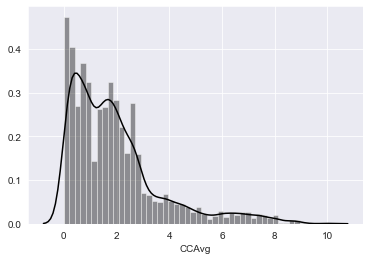

In [13]:
#Univariate and Bivariate

#Univariate

sns.distplot(bdata['CCAvg'], color = 'black')

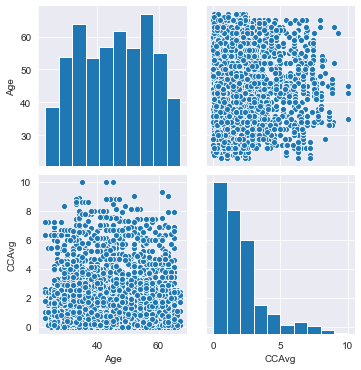

In [14]:
#Bivariate
sns.pairplot(bdata[['Age', 'CCAvg']])

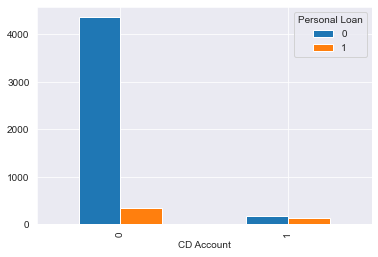

In [15]:
# Bivariate Analysis

pd.crosstab(bdata['CD Account'],bdata['Personal Loan']).plot(kind='bar')

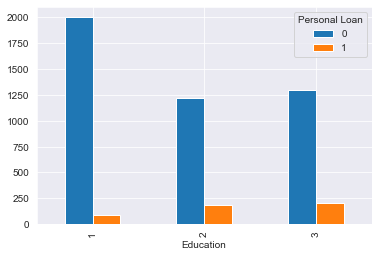

In [16]:
pd.crosstab(bdata['Education'],bdata['Personal Loan']).plot(kind='bar')

Higher number of people who had better education had recieved presonal loan offers when compared to people with lower education

In [17]:
bdata.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


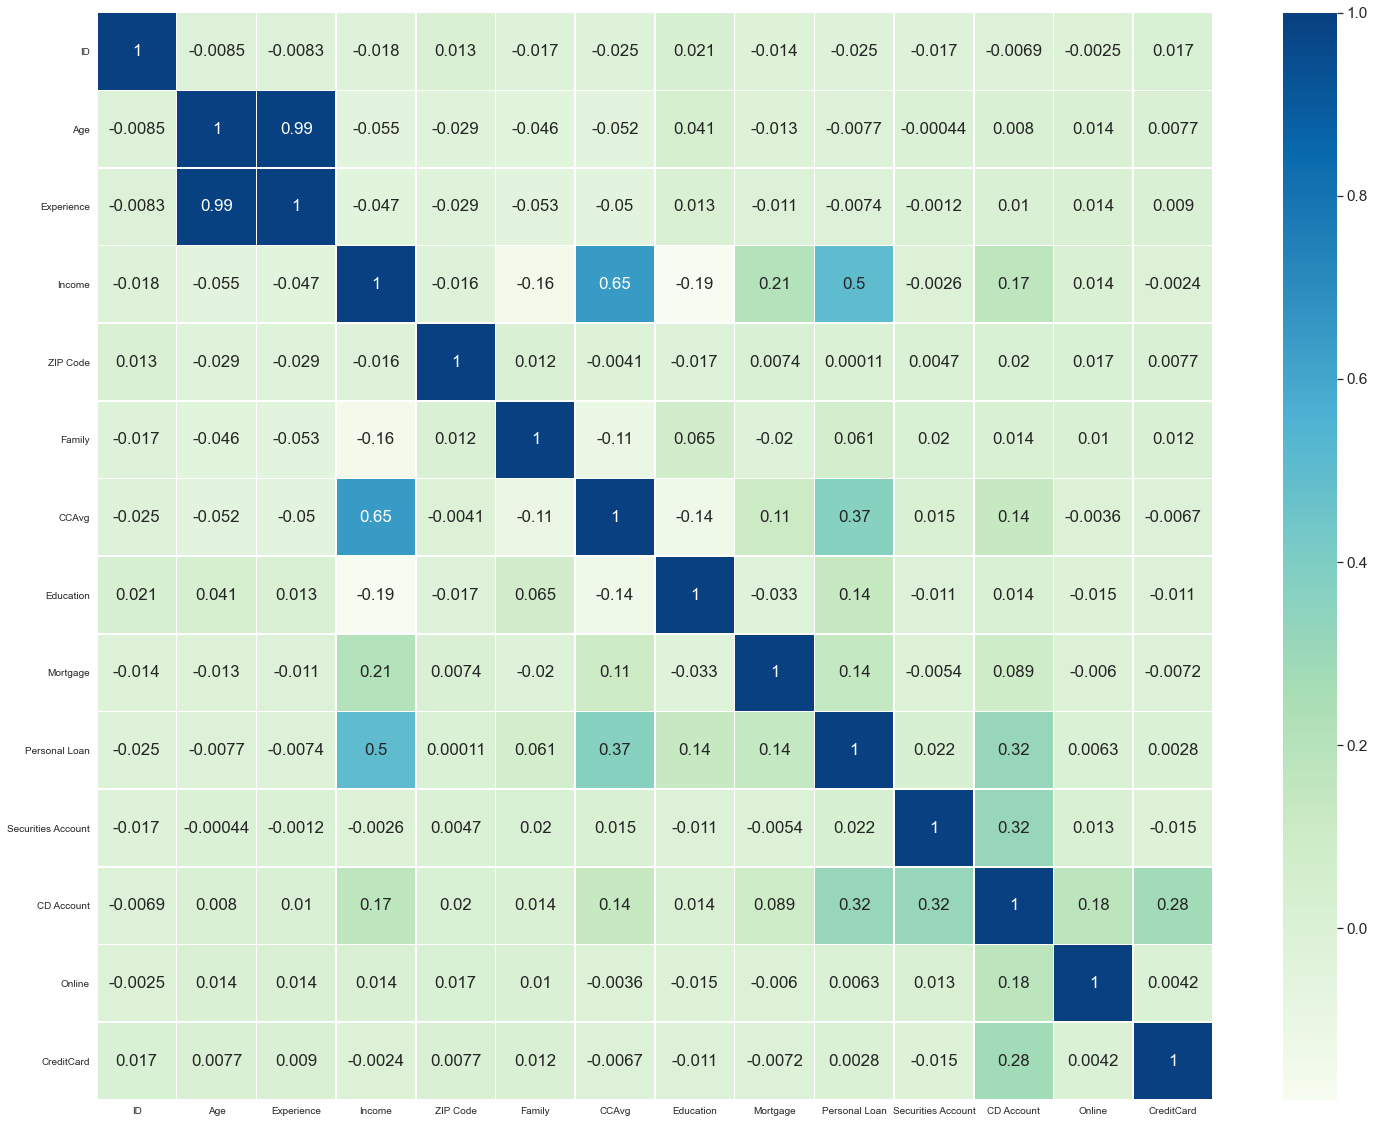

In [18]:
fig,ax = plt.subplots(figsize=(25, 20)) 
sns.set(font_scale=1.4)
sns.heatmap(bdata.corr(), annot= True, square=False,linewidths=.5, cmap=plt.cm.GnBu)

In [19]:
#Get data model ready

x=bdata.drop(['Securities Account','ID', 'Online','CreditCard','Personal Loan','ZIP Code','Age', 'Experience', 'Family'], axis=1)
y=bdata['Personal Loan']

## 3. Split the data into training and test set in the ratio of 70:30 respectively

In [20]:
# Importing train and test split library and splitting the data with 30% test size

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=1)

In [21]:
x_train.head()

,Income,CCAvg,Education,Mortgage,CD Account
1334,35,1.3,1,0,0
4768,39,2.0,2,0,0
65,131,3.8,1,0,0
177,65,1.8,2,244,0
4489,21,0.2,2,0,0


## 4. Logistic Regression

In [22]:
print("{0:0.1f}% data is in training set".format((len(x_train)/len(bdata.index)) * 100))
print("{0:0.1f}% data is in test set".format((len(x_test)/len(bdata.index)) * 100))

70.0% data is in training set
30.0% data is in test set


In [23]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)

#predict on test
y_predict = model.predict(x_test)

In [24]:
test_score = model.score(x_test, y_test)
print('Test Score:',test_score)

Test Score: 0.9446666666666667


In [25]:
train_score = model.score(x_train, y_train)
print('Training Score:',train_score)

Training Score: 0.9442857142857143


In [26]:
#Confusion Matrix

cm= metrics.confusion_matrix(y_test, y_predict)#, labels=[1, 0])
print ('Confusion Matrix:', cm)

Confusion Matrix: [[1340   11]
 [  72   77]]


## Confusion matrix

True Positives (TP): 77

True Negatives (TN): 1340

False Positives (FP): (a "Type I error") 104 Falsely predict positive Type I error

False Negatives (FN): (a "Type II error") 26 Falsely predict negative Type II error

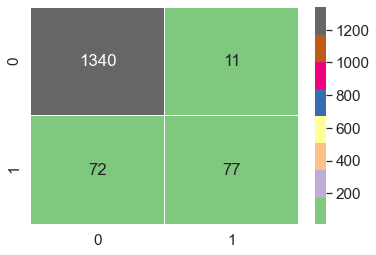

In [27]:
#Heatmap - Confusion Matrix
plt.figure(figsize= (6,4))
heatmap = sns.heatmap(cm,square=False,annot=True,fmt='d',cbar=True,linewidths=.5,cmap=plt.cm.Accent) #square=True,,cbar=True

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.88      0.52      0.65       149

    accuracy                           0.94      1500
   macro avg       0.91      0.75      0.81      1500
weighted avg       0.94      0.94      0.94      1500



In [29]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_predict))

Accuracy: 0.9446666666666667


In [30]:
from sklearn.metrics import precision_score
print("Precision:", precision_score(y_test,y_predict))

Precision: 0.875


In [31]:
from sklearn.metrics import recall_score
print("Recall:",recall_score(y_test, y_predict))

Recall: 0.5167785234899329


In [32]:
from sklearn.metrics import f1_score
print("f1 Score:", f1_score(y_test, y_predict))

f1 Score: 0.649789029535865


In [33]:
from sklearn.metrics import roc_auc_score
print("roc_auc_score:",roc_auc_score(y_test,y_predict))

roc_auc_score: 0.7543182032697628


## 5. Find out coefficients of all the attributes and show the output in a data frame with column names? For test data show all the rows where the predicted class is not equal to the observed class.


In [34]:
coef_df = pd.DataFrame(model.coef_)
#coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2        3         4
0  0.038943  0.131367  1.307706  0.00068  1.976198


In [35]:
tra=model.coef_.transpose()
print(tra)

[[3.89432167e-02]
 [1.31367167e-01]
 [1.30770613e+00]
 [6.79944793e-04]
 [1.97619779e+00]]


In [36]:
coeff_df = pd.DataFrame(tra,x.columns, columns =['Co-efficient'])
coeff_df

,Co-efficient
Income,0.038943
CCAvg,0.131367
Education,1.307706
Mortgage,0.000680
CD Account,1.976198


In [37]:
coef_table = pd.DataFrame(list(x_train.columns)).copy()
coef_table.insert(len(coef_table.columns),"Co-effecient",coef_df.transpose())
print(coef_table)

            0  Co-effecient
0      Income      0.038943
1       CCAvg      0.131367
2   Education      1.307706
3    Mortgage      0.000680
4  CD Account      1.976198


In [38]:
#All the rows where the predicted class is not equal to the observed class

df = pd.DataFrame(x_test)
df["Actual"] = y_test
df["Predicted"] = y_predict
mismatch = df[df["Actual"] != df["Predicted"]]
mismatch.head(100)

,Income,CCAvg,Education,Mortgage,CD Account,Actual,Predicted
3271,93,4.1,2,0,0,1,0
349,60,3.0,1,132,0,1,0
927,95,3.7,2,138,0,1,0
2968,162,1.3,1,301,0,1,0
1518,64,3.0,3,221,0,1,0
...,...,...,...,...,...,...,...
1793,113,0.8,3,0,0,1,0
813,130,1.1,2,0,0,1,0
3766,108,3.8,2,304,0,1,0
351,155,5.3,2,0,0,1,0


In [39]:
print("Total number of mismatched rows:",len(mismatch.index))

Total number of mismatched rows: 83


## 6. Conclusion related to the Business understanding of the model

In [ ]:
#The solution to the problem was to predict the likelihood of a liability customer buying personal loans.
#Based on the variables given and from the training and testing data,
#There will be 1417 (1340 does not take loan+77 who takes loan)customers from true positive and true negative are liable customer buying personal loan.
#Metrics calculation provides accuracy as 94% with a little variation between train and test data.